# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [5]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
amy,"Yes! Thank you so much, Chicago. Thank you. I ...",Amy Schumer
andrew,"Hey, it’s Andrew Santino, and here I am in my ...",Andrew Santino
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
beth,"Beth Stelling’s stand-up comedy special, “If Y...",Beth Stelling
bill,"[audience cheering, whistling] [emcee] Ladies ...",Bill Burr
chelsea,"Air date: November 14, 2014 [Peretti opens the...",Chelsea Peretti
joe,[indistinct chattering] [faint laughter] [audi...,Joe Rogan
mae,[fire crackling] [pensive instrumental music p...,Mae Martin
matt,"In his second hour-long comedy special, “Matth...",Matt Rife


In [13]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.070989,0.482223
amy,"Yes! Thank you so much, Chicago. Thank you. I ...",Amy Schumer,0.144379,0.548150
andrew,"Hey, it’s Andrew Santino, and here I am in my ...",Andrew Santino,0.065154,0.532439
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.060895,0.558444
beth,"Beth Stelling’s stand-up comedy special, “If Y...",Beth Stelling,0.098217,0.468059
bill,"[audience cheering, whistling] [emcee] Ladies ...",Bill Burr,0.066754,0.532161
chelsea,"Air date: November 14, 2014 [Peretti opens the...",Chelsea Peretti,0.096870,0.530239
joe,[indistinct chattering] [faint laughter] [audi...,Joe Rogan,-0.024004,0.590787
mae,[fire crackling] [pensive instrumental music p...,Mae Martin,0.094967,0.522457
matt,"In his second hour-long comedy special, “Matth...",Matt Rife,0.092761,0.523280


#### Joe Rogan has an overall negative polarity meanwhile the subjectivity score is pretty much in between( kind of mean)

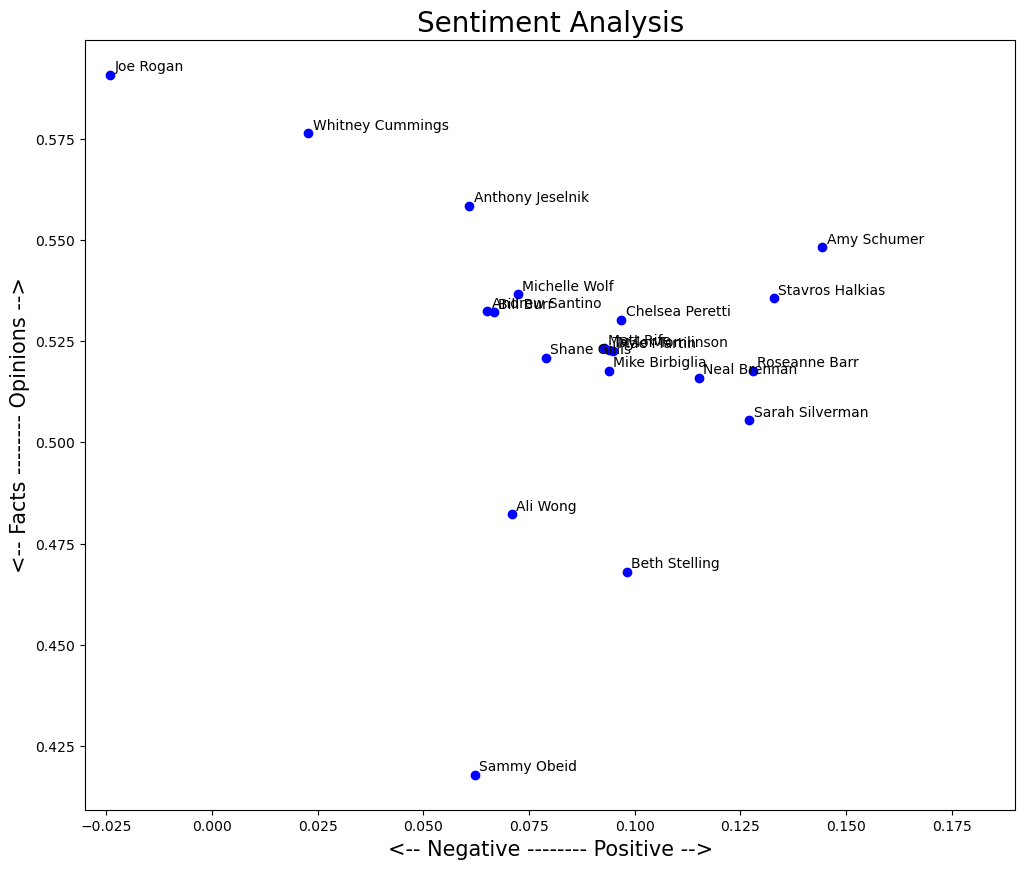

In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 10]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.03, .19) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

#### Sammy Obeid's sketch is about The ongoing Palestine War therefore his sensitivity score is leaning more towards the factual end.
#### Joe Rogan being a podcast host is tending to lean more towards the opinionated and negative polar end.One reviewer says the special is "fun style of comedy in short bursts, but often devolves into just an angry guy yelling on stage about his outdated beliefs".
#### Whitney Cummings script "I Love You" is involving her recent heart break and therefore showing negative polarity.

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [14]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [15]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.070989,0.482223
amy,"Yes! Thank you so much, Chicago. Thank you. I ...",Amy Schumer,0.144379,0.548150
andrew,"Hey, it’s Andrew Santino, and here I am in my ...",Andrew Santino,0.065154,0.532439
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.060895,0.558444
beth,"Beth Stelling’s stand-up comedy special, “If Y...",Beth Stelling,0.098217,0.468059
bill,"[audience cheering, whistling] [emcee] Ladies ...",Bill Burr,0.066754,0.532161
chelsea,"Air date: November 14, 2014 [Peretti opens the...",Chelsea Peretti,0.096870,0.530239
joe,[indistinct chattering] [faint laughter] [audi...,Joe Rogan,-0.024004,0.590787
mae,[fire crackling] [pensive instrumental music p...,Mae Martin,0.094967,0.522457
matt,"In his second hour-long comedy special, “Matth...",Matt Rife,0.092761,0.523280


In [16]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through. And then, when they go to sleep, they just go to

In [17]:
# The list has 10 elements, one for each transcript
len(list_pieces)

20

In [18]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [19]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.10982341269841271,
  0.07110552202101499,
  0.06301550703724616,
  0.11051108985260771,
  -0.026040100250626568,
  0.12504316714421734,
  0.043776142688480346,
  0.11059920634920634,
  0.025180520124716554,
  0.08484996738421395],
 [0.09057539682539682,
  0.2366923956546598,
  0.13792870750107591,
  0.17107867220962453,
  0.12896497441951985,
  0.17286927718745898,
  0.0953299216848657,
  0.06468017762660619,
  0.09805349412492272,
  0.23410308441558447],
 [0.13967173503064592,
  -0.0058986737357523975,
  0.13249120670995665,
  0.0491988989271598,
  0.14251379210220672,
  0.0023890358612580673,
  0.01743350493350497,
  0.026671381423856673,
  0.07266255917571703,
  0.06512328335245],
 [0.14813544856227787,
  -0.09949866310160428,
  -0.012800819252432169,
  0.03688446969696969,
  0.12692862692862691,
  0.1366996336996337,
  0.07903174603174604,
  0.008718081435472721,
  0.024391379230088904,
  0.14854190593986508],
 [0.1778394544523577,
  0.09652777777777778,
  0.09276818509773058,


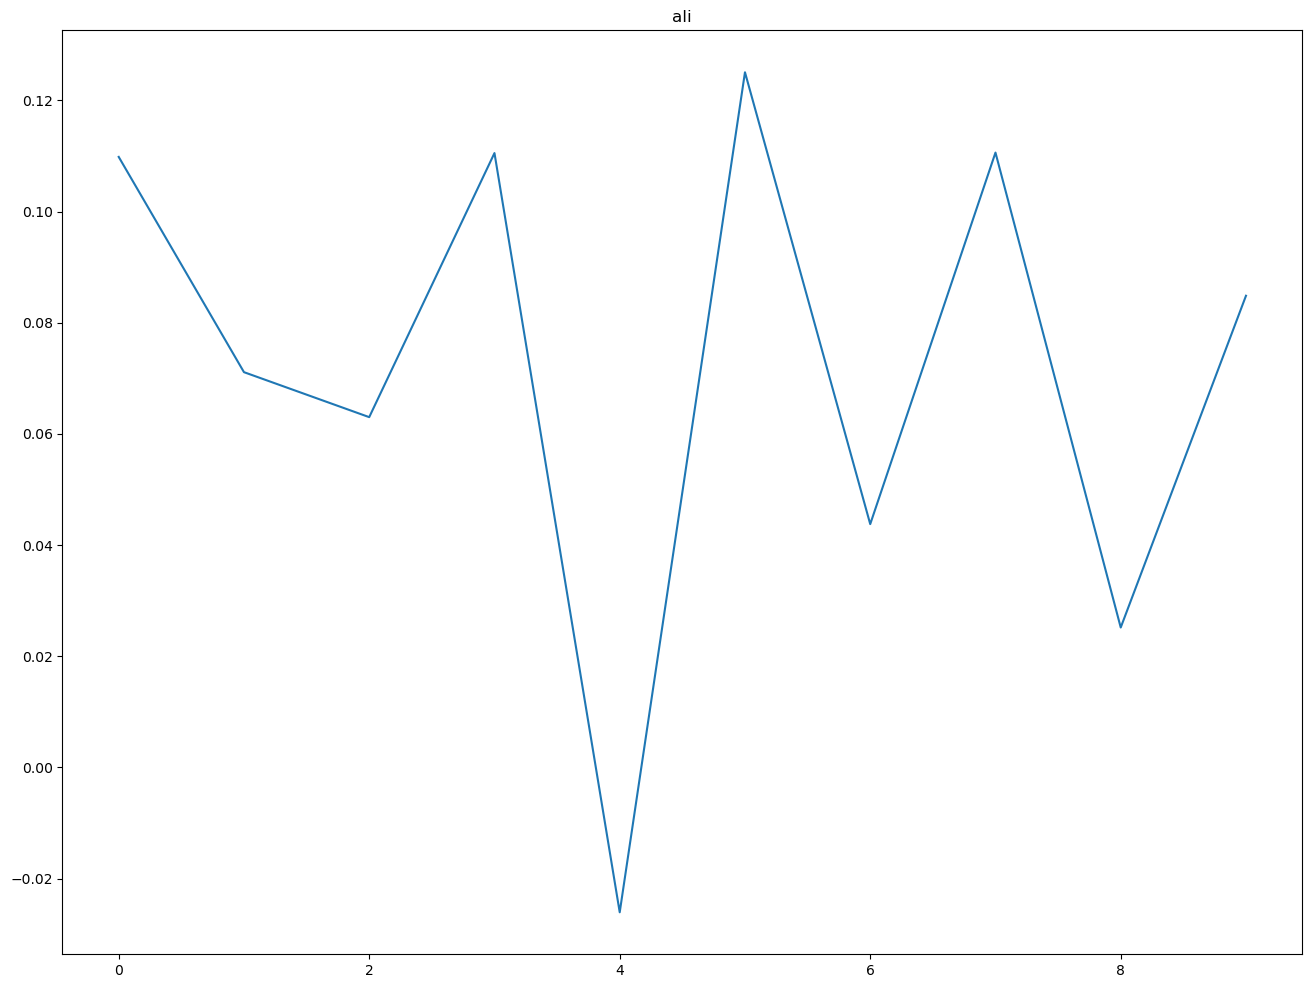

In [20]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

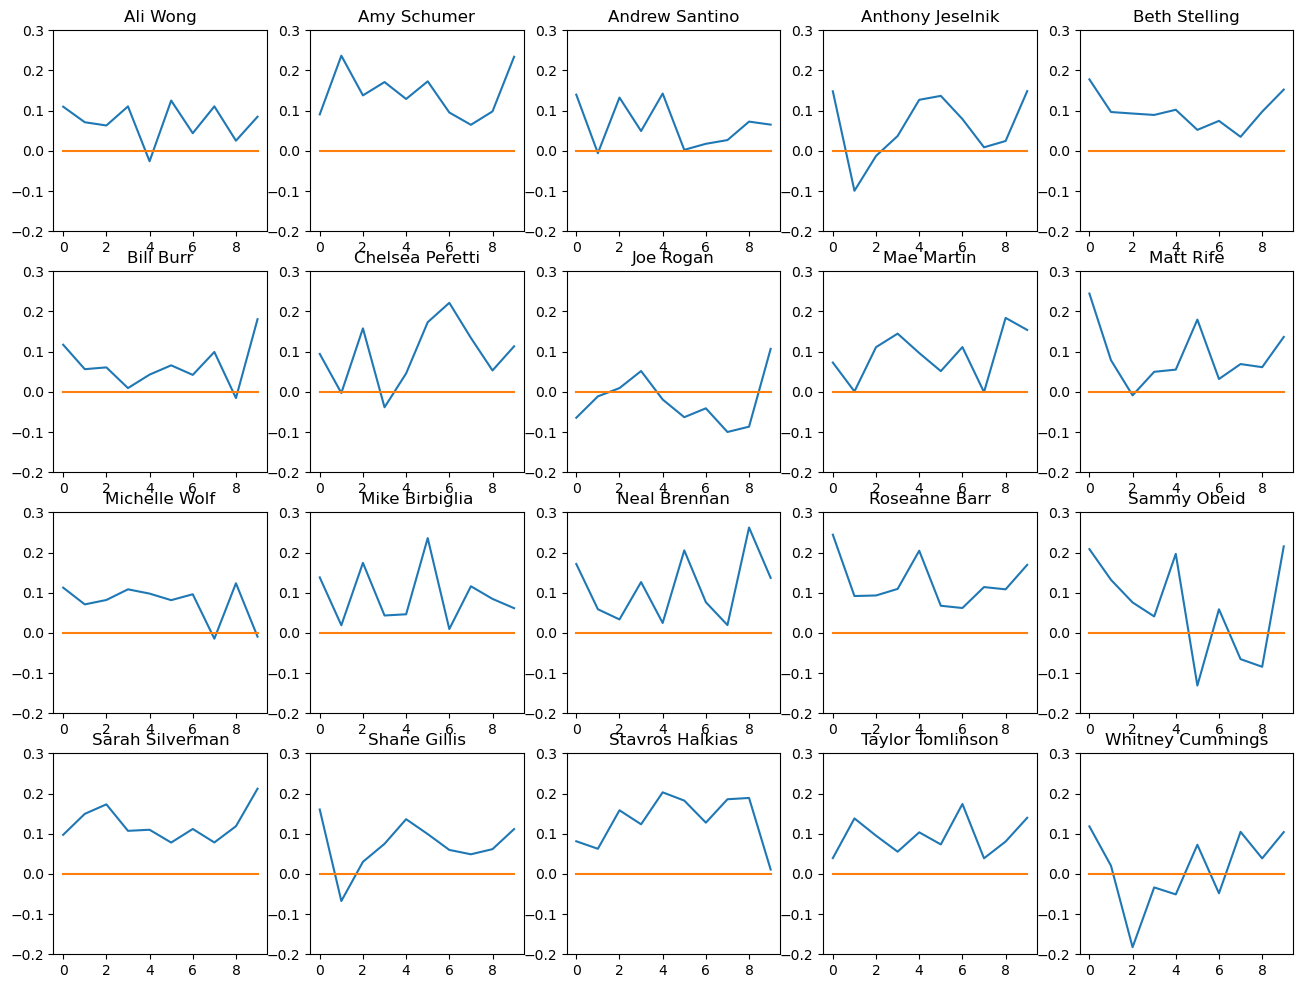

In [21]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### Assignments:
1. Classify all comedian according to Polarity and Subjectivity.

## Observations:
#### Ali Wong stays generally positive throughout her routine. Similar comedians are Neal Brennan,Sarah Silverman,Roseanne Barr,Michelle Wolf,Beth Stelling and Mike Birbiglia.

#### On the other hand, you have some pretty different patterns here like who gets happier as time passes Sarah Silverman,Amy Schumer.

#### Whitney Cummings(script centered around her recent break up), Sammy Obeid(political script about the curent palestenian war) who has some pretty down moments in his routine.

#### Sammy Obeid's sketch is about The ongoing Palestine War therefore his sensitivity score is leaning more towards the factual end.
#### Joe Rogan being a podcast host is tending to lean more towards the opinionated and negative polar end.One reviewer says the special is "fun style of comedy in short bursts, but often devolves into just an angry guy yelling on stage about his outdated beliefs".
#### Whitney Cummings script "I Love You" is involving her recent heart break and therefore showing negative polarity.

In [8]:
def split_tex(text, n=5):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [11]:
list_pieces = []
import math
import numpy as np
import matplotlib.pyplot as plt
for t in data.transcript:
    split = split_tex(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through. And then, when they go to sleep, they just go to

In [14]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.0888389070640979,
  0.08349352813852817,
  0.05206226679247072,
  0.07008443546829372,
  0.05894695151962592],
 [0.16503886738261733,
  0.155332438973064,
  0.1533562537350416,
  0.0853580590810704,
  0.16084561272061274],
 [0.07148349092428041,
  0.10002132401496802,
  0.06286393065998334,
  0.021834568733153665,
  0.06596101680288101],
 [0.03587465127465132,
  0.010778639909995837,
  0.1318141303141303,
  0.04348857491714632,
  0.07919656669656669],
 [0.1388918446166345,
  0.09087776258828889,
  0.07602970881775227,
  0.05077542701863354,
  0.1243774333632824],
 [0.08747287013892661,
  0.03391543850864972,
  0.05301311481244216,
  0.07131842477250644,
  0.07878730759980758],
 [0.0504188045957019,
  0.05885860798007027,
  0.11847375769448552,
  0.17597204699361638,
  0.08117262802556922],
 [-0.03951882574714947,
  0.034123785856083555,
  -0.04362648612392467,
  -0.06866828805019413,
  0.002889785128066379],
 [0.03763522085669737,
  0.125796103085429,
  0.07178186081595173,
  0.055

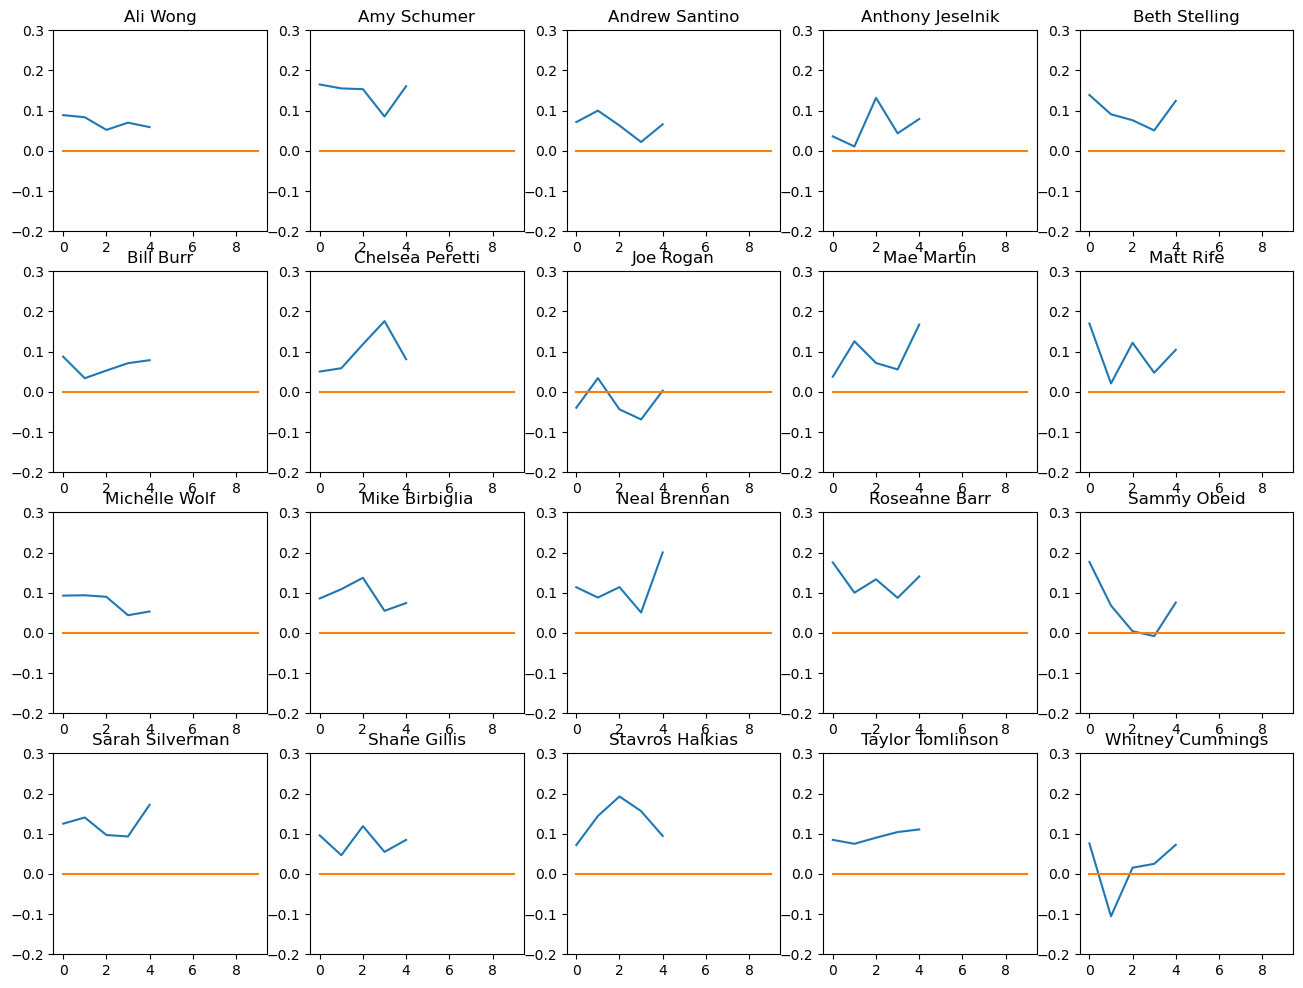

In [15]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()